# Lab 3/ Spotify data set😜😜😜😜

Minakov Nikita, csse 1707DA

@minakov.nv

In [5]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

from collections import Counter
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Again, I'll load my spotify db and select key == "F#":

In [4]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
#db_read.head()
keyF= db_read[db_read.key == 'F#']
keyF.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0000,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.939,0.416,240067,0.269,0.0000,F#,0.113,-8.949,Major,0.0286,96.827,4/4,0.274
12,Movie,Idoles De La Musique,J'ai demandé à la lune,0jF6HUm18fg6QQCLHhfhC0,4,0.215,0.680,213589,0.600,0.0729,F#,0.111,-7.702,Minor,0.0258,110.026,4/4,0.433
61,Movie,Chorus,Mangal Aarti,2SJMPPj5nNlizdz58AgzL6,0,0.455,0.714,184987,0.346,0.0000,F#,0.592,-14.199,Major,0.0967,81.668,4/4,0.601
69,Movie,Chorus,Takhti Par Takhti,2blJzY8Ohl2E2vEdQ2wlEn,0,0.933,0.676,214093,0.697,0.0117,F#,0.484,-7.810,Minor,0.1090,105.921,4/4,0.914


Here's the histogram of popularity:

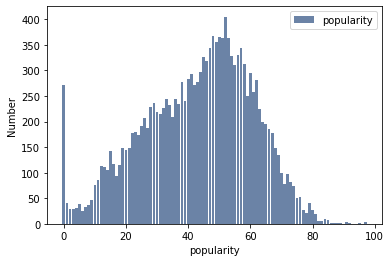

In [3]:
pop_hist = thinkstats2.Hist(keyF.popularity, label='popularity')
thinkplot.Hist(pop_hist)
thinkplot.Config(xlabel = 'popularity', ylabel = 'Number')

This graph is very similar to the distribution of popularity of all songs in the dataset. It has a characteristic preponderance of the number of “not popular songs”, but a normal distribution shape.

To normalize the disrtibution, we could divide through by the total count:

In [7]:
n = pop_hist.Total()
pmf = pop_hist.Copy()
for x, freq in pmf.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

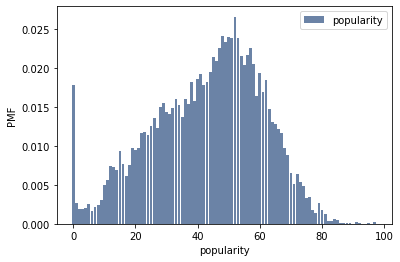

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='popularity', ylabel='PMF')

There should be a pmf propability for popularity songs. 

That is hist built using seaborn library. It is the same, and created just to show that they are the same. In the future wil be used both methods to build Hists. (Or not if I'm lazy)

Text(0, 0.5, 'PMF')

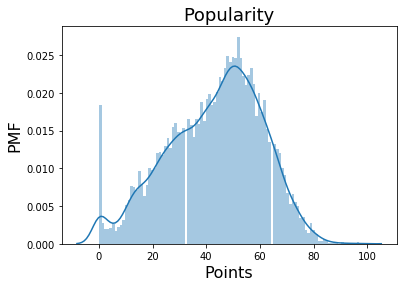

In [16]:
sns.distplot(keyF.popularity, bins=100) #, kde=False
plt.title('Popularity', fontsize=18)
plt.xlabel('Points', fontsize=16)
plt.ylabel('PMF', fontsize=16)

Text(0, 0.5, 'PMF')

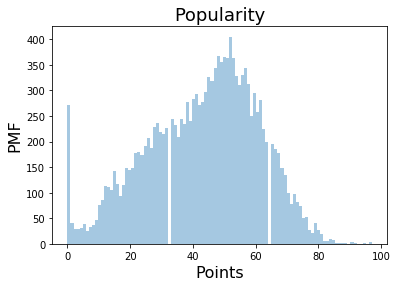

In [15]:
sns.distplot(keyF.popularity,kde=False, bins=100) #, 
plt.title('Popularity', fontsize=18)
plt.xlabel('Points', fontsize=16)
plt.ylabel('PMF', fontsize=16)

The main advantage of SEAborn library is that is posible to creat bins for data. And also we can build different (pdf, cdf, pmf) graphs without pre-preparation.

More directly, we can create a Pmf object.

In [20]:
#pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')
pmf = thinkstats2.Pmf(keyF.energy, label='energy')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

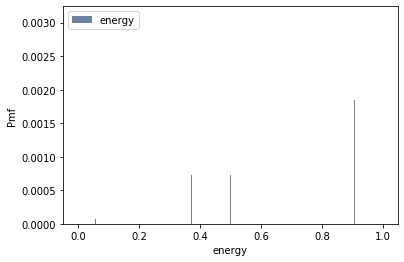

In [21]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='energy', ylabel='Pmf')

Text(0.5, 0, 'Points')

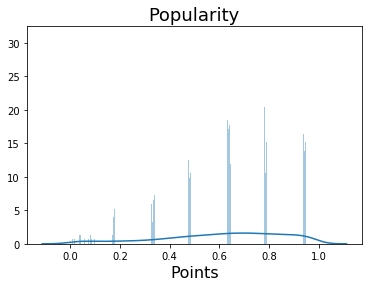

In [31]:
sns.distplot(keyF.energy, bins=10000) 
plt.title('Popularity', fontsize=18)
plt.xlabel('Points', fontsize=16)


Text(0.5, 0, 'Points')

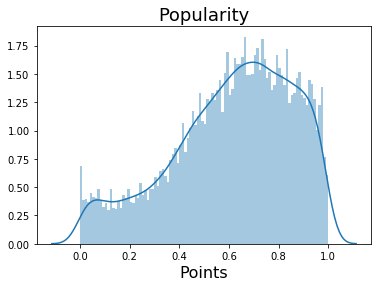

In [32]:
sns.distplot(keyF.energy, bins=100) 
plt.title('Popularity', fontsize=18)
plt.xlabel('Points', fontsize=16)

Previous 2 hists shows advantages of binning when we are worhing with big range of data. They are absolutely different, and help to identify different dependances.

Here we can se bar graph with propability of energy.

Here's what it looks like plotted with `Pmf`, which makes a step function.

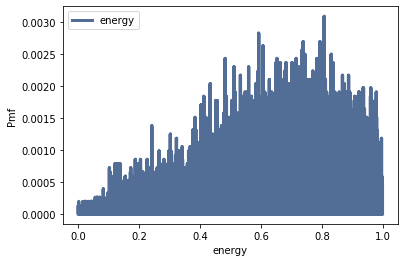

In [33]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='energy', ylabel='Pmf')

As we can see, result is +- same as when i was using bins in seaborn

Here we can se step function of propability of energy.

Compairing popularity for Minor and Major mods

In [39]:
minor = db_read[db_read['mode'] == 'Minor']
major = db_read[db_read['mode'] == 'Major']

In [40]:
minor_pmf = thinkstats2.Pmf(minor.popularity, label='minor')
major_pmf = thinkstats2.Pmf(major.popularity, label='major')

Popularity beetwen major and minor songs.

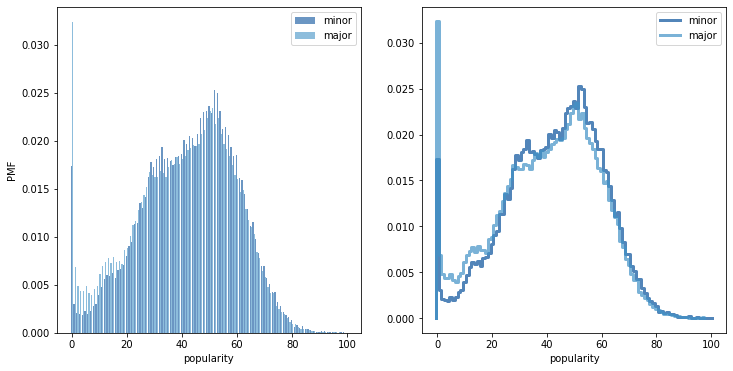

In [43]:
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(minor_pmf, align='right', width=width)
thinkplot.Hist(major_pmf, align='left', width=width)
thinkplot.Config(xlabel='popularity', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([minor_pmf, major_pmf])
thinkplot.Config(xlabel='popularity')

These graphs describe the likelihood of the PMF occurrence of popularity of minor and major songs.

Here's the code that generates a plot of the difference in probability (in percentage points) between minor and major. 

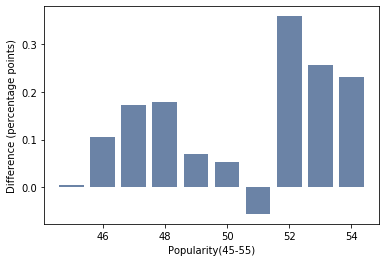

In [47]:
popul = range(45, 55)
diffs = []
for mode in popul:
    p1 = minor_pmf.Prob(mode)
    p2 = major_pmf.Prob(mode)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(popul, diffs)
thinkplot.Config(xlabel='Popularity(45-55)', ylabel='Difference (percentage points)')

This graph shows difference in probability (in percentage points) between minor and major. A particularly large difference is visible starting at 52

## Exercises

Compairing different types of songs by there genre.

In [10]:
#resp = nsfg.ReadFemResp()
db_read.genre.value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [11]:
Pop_db = db_read[db_read['genre'] == 'Pop']
Jazz_db = db_read[db_read['genre'] == 'Jazz']

Movie_db = db_read[db_read['genre'] == 'Movie']
Anime_db = db_read[db_read['genre'] == 'Anime']

In [12]:
# Solution
#pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

Pop_pmf = thinkstats2.Pmf(Pop_db.popularity, label='Pop')
Jazz_pmf = thinkstats2.Pmf(Jazz_db.popularity, label='Jazz')

Movie_pmf = thinkstats2.Pmf(Movie_db.popularity, label='Movie')
Anime_pmf = thinkstats2.Pmf(Anime_db.popularity, label='popularity')

Compairing Pop and Jazz genres

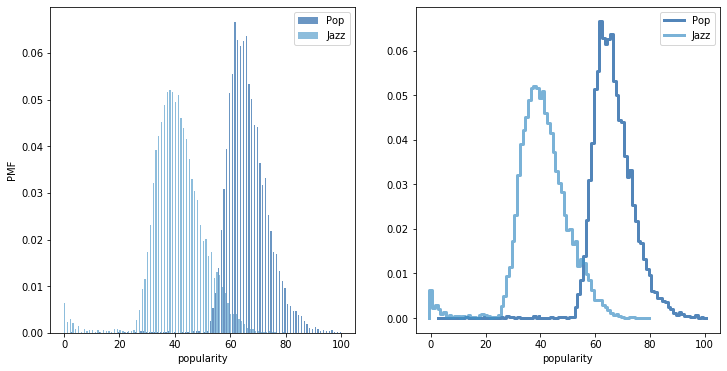

In [13]:
# Solution
#thinkplot.Pmf(pmf)
#thinkplot.Config(xlabel='Number of children', ylabel='PMF')
width=0.45
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(Pop_pmf, align='right', width=width)
thinkplot.Hist(Jazz_pmf, align='left', width=width)
thinkplot.Config(xlabel='popularity', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Pop_pmf, Jazz_pmf])
thinkplot.Config(xlabel='popularity')

This graph clearly demonstrates the superiority of pop over jazz. The difference between the peaks of popularity is about 20 hits, and the likelihood of popularity for the priest is higher.

Compairing Movie and Anime genres

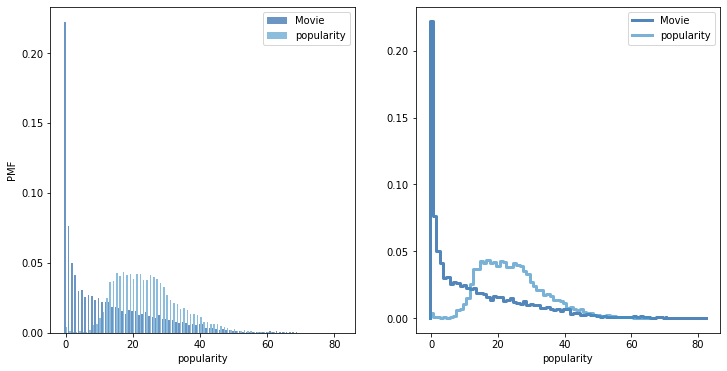

In [14]:
width=0.45
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(Movie_pmf, align='right', width=width)
thinkplot.Hist(Anime_pmf, align='left', width=width)
thinkplot.Config(xlabel='popularity', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([Movie_pmf, Anime_pmf])
thinkplot.Config(xlabel='popularity')

Much to the surprise, music from anime is more popular than from movies, but again, it can not be compared with Pop and Jazz.

In [71]:
# Solution
#biased = BiasPmf(pmf, label='biased')
pop_biased = BiasPmf(Pop_pmf, label='biased Pop')
jazz_biased = BiasPmf(Jazz_pmf, label='biased Jazz')


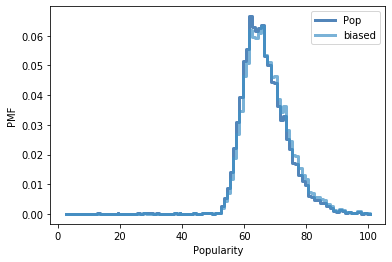

In [73]:
# Solution
#thinkplot.PrePlot(2)
#thinkplot.Pmfs([pmf, biased])
#thinkplot.Config(xlabel='Number of children', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.Pmfs([Pop_pmf, pop_biased])
thinkplot.Config(xlabel='Popularity', ylabel='PMF')

To compute the biased distribution, we loop through the items in the PMF and multiply each probability by its corresponding value. Here what we get

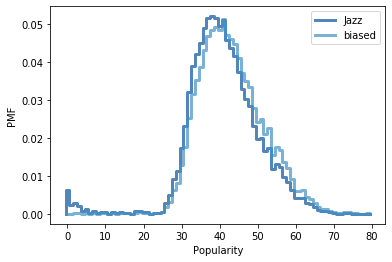

In [74]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([Jazz_pmf, jazz_biased])
thinkplot.Config(xlabel='Popularity', ylabel='PMF')

The same is actual for Jazz, but there is much diference between them.

In [76]:
Pop_pmf.Mean()

66.59066695077773

In [77]:
Jazz_pmf.Mean()

40.824383010274325

In [78]:
pop_biased.Mean()

67.37965825093602

In [79]:
jazz_biased.Mean()

43.07637323148853